In [74]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [25]:
raw_data = pd.read_csv("raw_data/company.csv")
raw_data.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
0,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15
1,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15
2,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16
3,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16
4,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16


In [3]:
raw_data.dtypes

ACCT_ID                       float64
SUBSCRIPTION_BILLABLE_TYPE     object
SUBSCRIPTION_TYPE              object
SKU_LENGTH                     object
SUB_STATE                      object
SUB_START_DATE                 object
SUB_END_DATE                   object
dtype: object

In [4]:
print(raw_data.duplicated().sum())
print(raw_data.isna().sum())

2
ACCT_ID                       0
SUBSCRIPTION_BILLABLE_TYPE    0
SUBSCRIPTION_TYPE             0
SKU_LENGTH                    0
SUB_STATE                     0
SUB_START_DATE                0
SUB_END_DATE                  0
dtype: int64


In [5]:
data = raw_data.copy()

data.drop_duplicates(inplace=True)

data["ACCT_ID"] = data["ACCT_ID"].astype("int").astype("string")

data["SUB_START_DATE"] = pd.to_datetime(data["SUB_START_DATE"])
data["SUB_END_DATE"] = pd.to_datetime(data["SUB_END_DATE"])

In [6]:
# Create column DURATION
data["DURATION"] = data["SUB_END_DATE"] - data["SUB_START_DATE"]
data["DURATION"] = data["DURATION"].astype("string").apply(lambda x: x.replace(" days","")).astype("int")

In [7]:
data

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,DURATION
0,188368000000000,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15,31
1,188368000000000,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15,30
2,188368000000000,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16,31
3,188368000000000,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16,30
4,188368000000000,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16,31
...,...,...,...,...,...,...,...,...
28256,675542000000000,Paid,Wallet,1 month,Renewal,2020-12-14,2021-01-14,31
28257,301694000000000,Paid,Retail,3 months,Acquisition,2019-09-27,2019-12-27,91
28258,301694000000000,Paid,Retail,3 months,Reclaim,2020-04-16,2020-07-16,91
28259,301694000000000,Paid,Retail,3 months,Renewal,2020-07-25,2020-10-25,92


In [8]:
data.dtypes

ACCT_ID                               string
SUBSCRIPTION_BILLABLE_TYPE            object
SUBSCRIPTION_TYPE                     object
SKU_LENGTH                            object
SUB_STATE                             object
SUB_START_DATE                datetime64[ns]
SUB_END_DATE                  datetime64[ns]
DURATION                               int64
dtype: object

In [9]:
# Create table total_dur
total_dur = data.copy()[["ACCT_ID","DURATION"]]
total_dur = total_dur.groupby("ACCT_ID", as_index=False).sum()
total_dur

,ACCT_ID,DURATION
0,100006000000000,365
1,100040000000000,61
2,100101000000000,366
3,100102000000000,365
4,100179000000000,366
...,...,...
9584,996953000000000,30
9585,997255000000000,731
9586,997347000000000,14
9587,998072000000000,731


# First explo

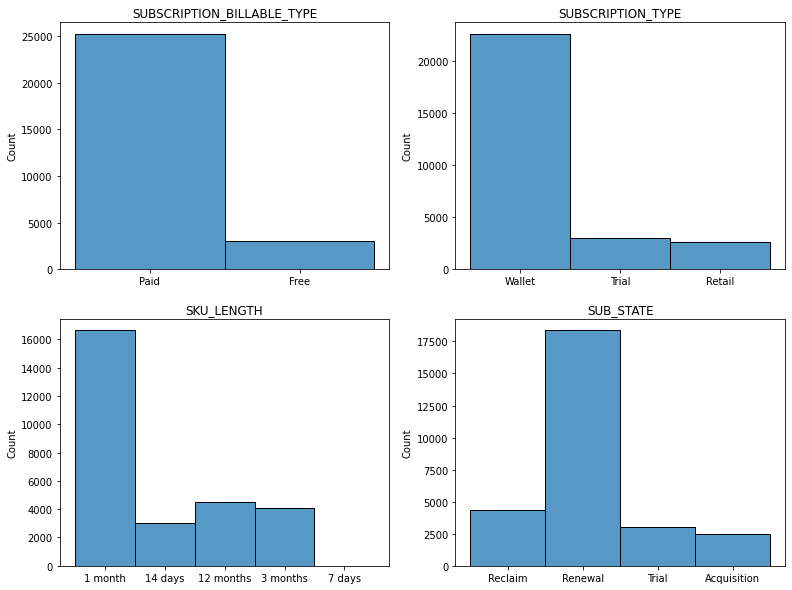

In [10]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title("SUBSCRIPTION_BILLABLE_TYPE")
sns.histplot(data["SUBSCRIPTION_BILLABLE_TYPE"])
plt.xlabel("")

plt.subplot(2,2,2)
plt.title("SUBSCRIPTION_TYPE")
sns.histplot(data["SUBSCRIPTION_TYPE"])
plt.xlabel("")

plt.subplot(2,2,3)
plt.title("SKU_LENGTH")
sns.histplot(data["SKU_LENGTH"])
plt.xlabel("")

plt.subplot(2,2,4)
plt.title("SUB_STATE")
sns.histplot(data["SUB_STATE"])
plt.xlabel("");


In [11]:
df_by_day = data.copy().groupby(["SUB_START_DATE","SUB_STATE"], as_index=False).count().set_index("SUB_START_DATE")
df_by_day.drop(columns=['ACCT_ID', 'SUBSCRIPTION_BILLABLE_TYPE',
       'SUBSCRIPTION_TYPE', 'SKU_LENGTH', 'SUB_END_DATE'], inplace=True)
df_by_day.columns = ["SUB_STATE","SUM"]
df_by_day

,SUB_STATE,SUM
SUB_START_DATE,,
2019-06-01,Acquisition,8
2019-06-01,Reclaim,7
2019-06-01,Renewal,14
2019-06-01,Trial,2
2019-06-02,Acquisition,1
...,...,...
2020-12-30,Renewal,46
2020-12-30,Trial,1
2020-12-31,Acquisition,2


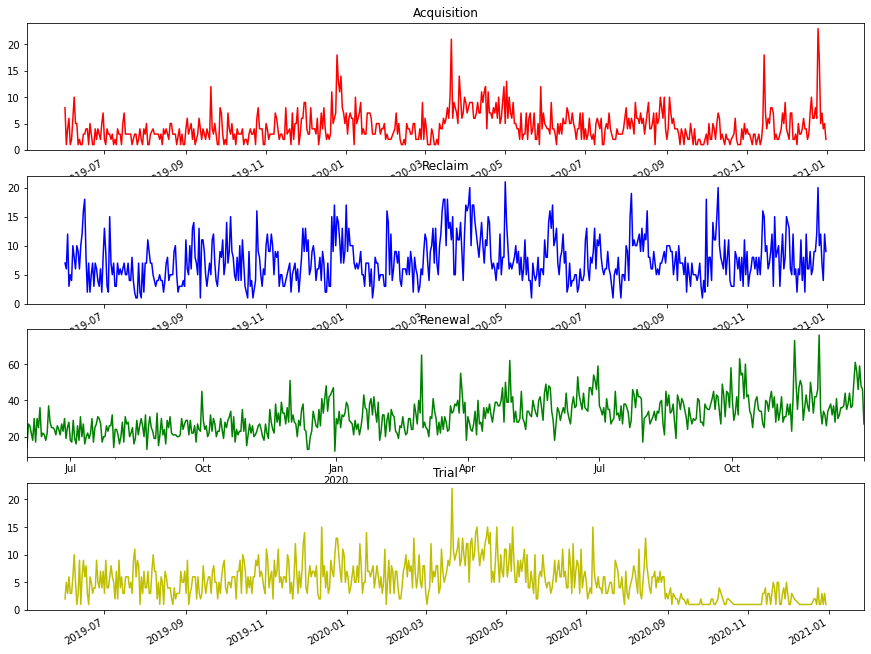

In [12]:
plt.figure(figsize=(15,12))

plt.subplot(4,1,1)
plt.title("Acquisition")
df_by_day['SUM'][df_by_day["SUB_STATE"]=="Acquisition"].plot(color='r')
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,1,2)
plt.title("Reclaim")
df_by_day['SUM'][df_by_day["SUB_STATE"]=="Reclaim"].plot(color='b')
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,1,3)
plt.title("Renewal")
df_by_day['SUM'][df_by_day["SUB_STATE"]=="Renewal"].plot(color='g')
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,1,4)
plt.title("Trial")
df_by_day['SUM'][df_by_day["SUB_STATE"]=="Trial"].plot(color='y')
plt.xlabel("")
plt.ylabel("");

In [159]:
df_by_month= data.copy().set_index("SUB_START_DATE")
df_by_month = pd.DataFrame(df_by_month.groupby([pd.Grouper(freq="M"), "SUB_STATE"])["ACCT_ID"].count())\
                .reset_index().set_index("SUB_START_DATE")
df_by_month.columns = ["SUB_STATE", "SUM"]

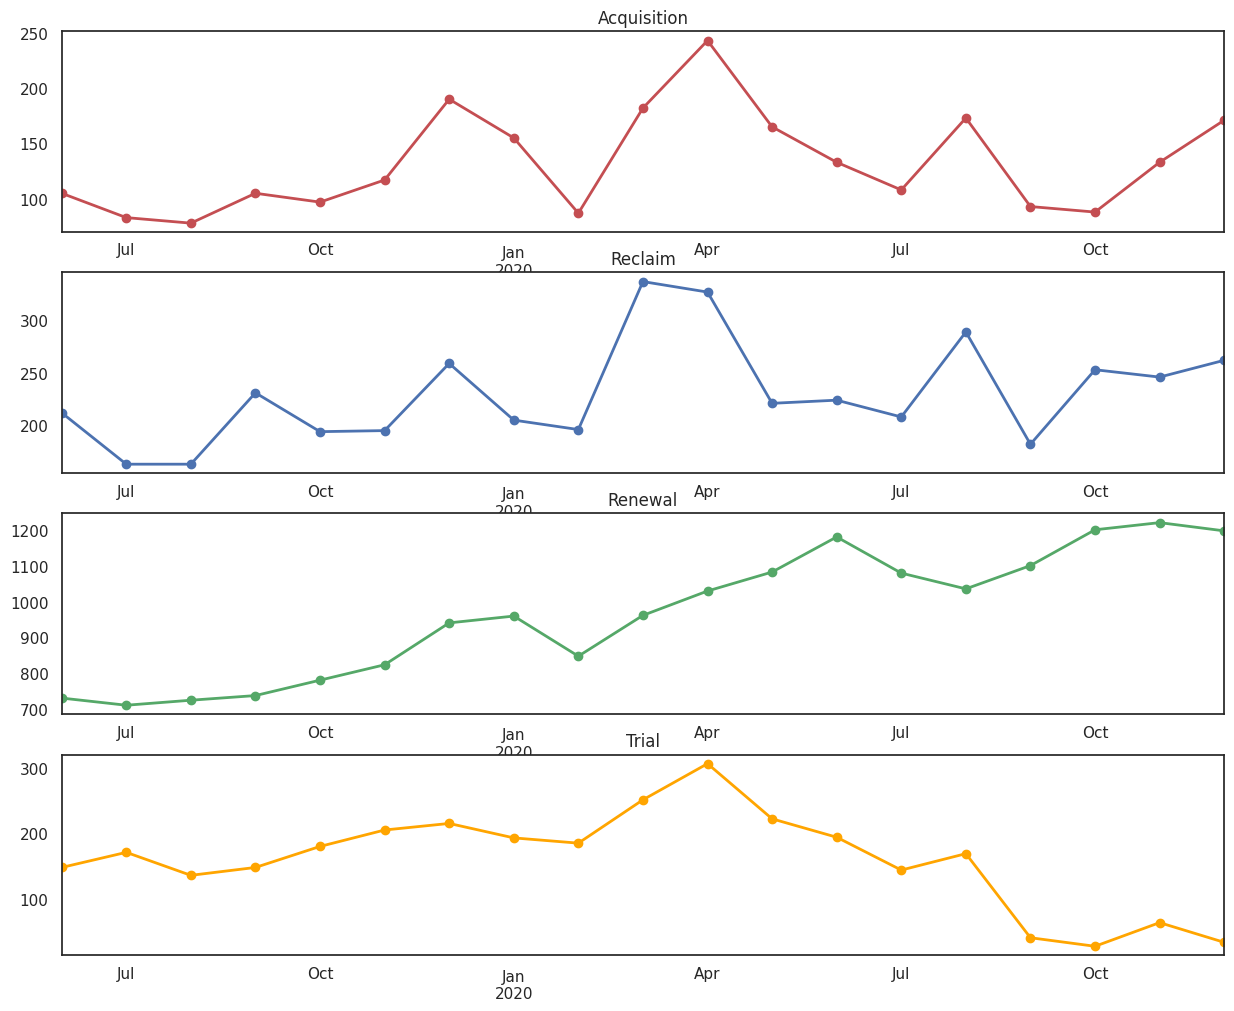

In [244]:
plt.figure(figsize=(15,12))

plt.subplot(4,1,1)
plt.title("Acquisition")
df_by_month['SUM'][df_by_month["SUB_STATE"]=="Acquisition"].plot(color='r', marker='o')
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,1,2)
plt.title("Reclaim")
df_by_month['SUM'][df_by_month["SUB_STATE"]=="Reclaim"].plot(color='b', marker='o')
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,1,3)
plt.title("Renewal")
df_by_month['SUM'][df_by_month["SUB_STATE"]=="Renewal"].plot(color='g', marker='o')
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,1,4)
plt.title("Trial")
df_by_month['SUM'][df_by_month["SUB_STATE"]=="Trial"].plot(color='orange', marker='o')
plt.xlabel("")
plt.ylabel("");

# Users with paid active subscriptions

In [202]:
def current_active(date, sub_state=None):
    '''
    return current active paid subscriptions given a day like '2020-03-03' as string.
    Option to focus on the SUB_STATE
    '''
    df_paid = data.copy()
    df_paid = df_paid[df_paid["SUBSCRIPTION_BILLABLE_TYPE"] == "Paid"]
    
    if sub_state is not None:
        df_paid = df_paid[df_paid["SUB_STATE"]==sub_state]
    
    temp = df_paid[(df_paid["SUB_START_DATE"] <= date)&(df_paid["SUB_END_DATE"] >= date)]
    
    return len(temp)  

    

In [203]:
current_active('2020-03-03', "Renewal")

2290

In [204]:
# Create a new df to get evolution of number of paid subscriptions

df_paid = pd.DataFrame()
df_paid["SUB_START_DATE"] = data["SUB_START_DATE"].sort_values().drop_duplicates().reset_index(drop=True)
df_paid.columns = ["DATE"]
df_paid["ACTIVE_SUB"] = df_paid["DATE"].apply(lambda x: current_active(x))
df_paid["PERC_CHANGE"] = df_paid["ACTIVE_SUB"].pct_change()
df_paid.set_index("DATE", inplace=True)
df_paid["MONTHLY_PERC_CHANGE"] = temp["ACTIVE_SUB"].pct_change(freq="M")
df_paid

,ACTIVE_SUB,PERC_CHANGE,MONTHLY_PERC_CHANGE
DATE,,,
2019-06-01,29,NaN,NaN
2019-06-02,63,1.172414,NaN
2019-06-03,105,0.666667,NaN
2019-06-04,136,0.295238,NaN
2019-06-05,160,0.176471,NaN
...,...,...,...
2020-12-27,4766,0.001261,NaN
2020-12-28,4777,0.002308,NaN
2020-12-29,4763,-0.002931,NaN


In [205]:
df_paid_month = df_paid.copy().dropna()
df_paid_month.iloc[0,2] = 0
df_paid_month

,ACTIVE_SUB,PERC_CHANGE,MONTHLY_PERC_CHANGE
DATE,,,
2019-06-30,1048,0.042786,0.000000
2019-07-31,1382,-0.004323,0.318702
2019-08-31,1711,-0.003494,0.238061
2019-09-30,1990,0.012208,0.163063
2019-10-31,2161,-0.006893,0.085930
2019-11-30,2450,0.018711,0.133734
2019-12-31,2919,-0.006805,0.191429
2020-01-31,3270,-0.006683,0.120247
2020-02-29,3459,0.011108,0.057798


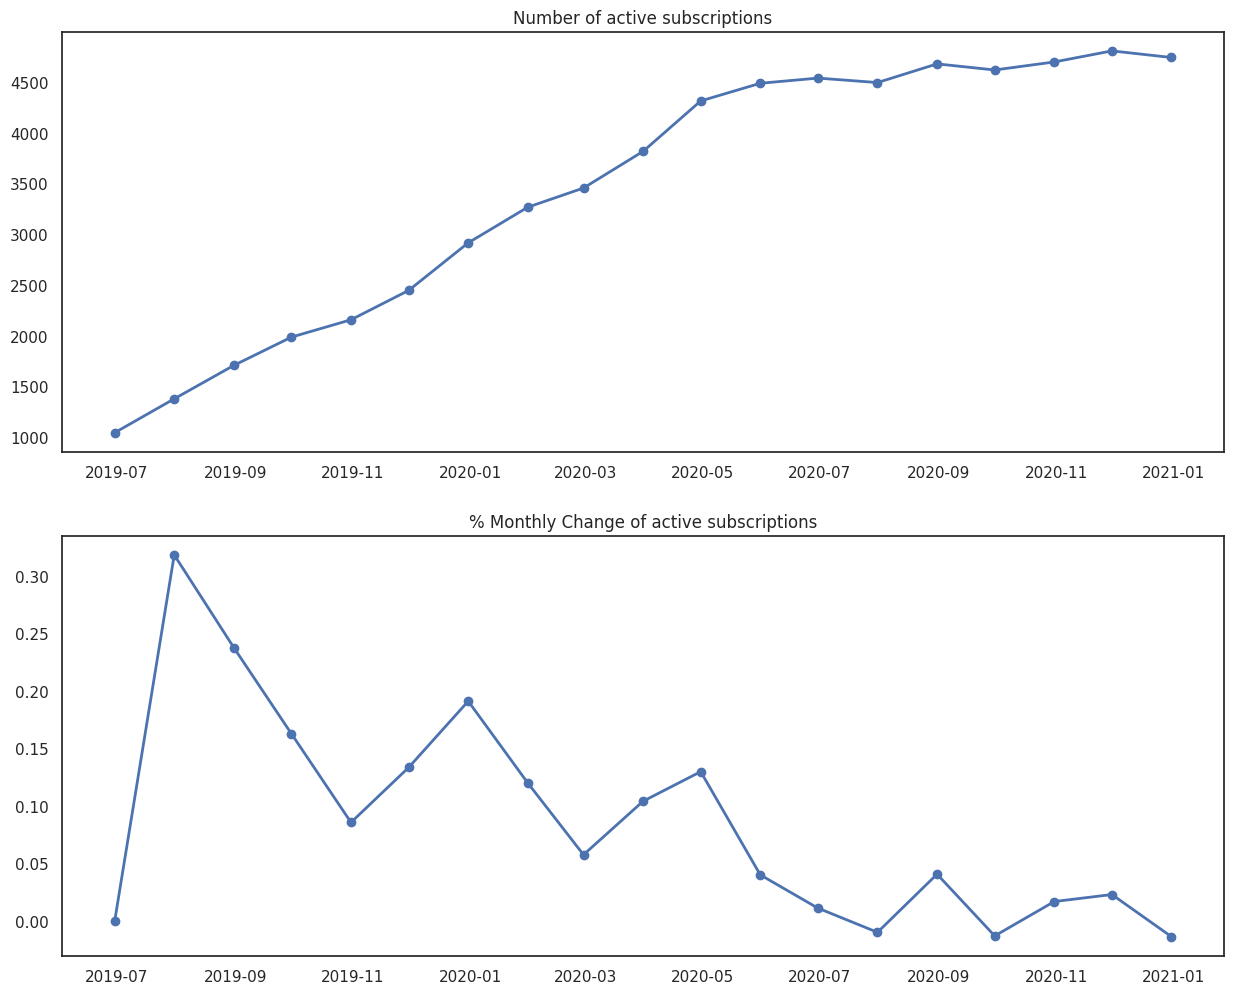

In [206]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.title("Number of active subscriptions")
plt.plot(df_paid_month["ACTIVE_SUB"],marker='o')

plt.subplot(2,1,2)
plt.title("% Monthly Change of active subscriptions")
plt.plot(df_paid_month["MONTHLY_PERC_CHANGE"], marker='o');

In [215]:
segmented_paid = pd.DataFrame()
segmented_paid["SUB_START_DATE"] = data["SUB_START_DATE"].sort_values().drop_duplicates().reset_index(drop=True)
segmented_paid.columns = ["DATE"]

liste_temp = ["Acquisition", "Reclaim", "Renewal"]

for elm in liste_temp:
    segmented_paid[elm] = segmented_paid["DATE"].apply(lambda x: current_active(x,elm))
    
segmented_paid.set_index("DATE", inplace=True)
segmented_paid["TOTAL"] = segmented_paid["Acquisition"] + segmented_paid["Reclaim"] + segmented_paid["Renewal"] 
segmented_paid

,Acquisition,Reclaim,Renewal,TOTAL
DATE,,,,
2019-06-01,8,7,14,29
2019-06-02,9,13,41,63
2019-06-03,13,25,67,105
2019-06-04,19,28,89,136
2019-06-05,20,33,107,160
...,...,...,...,...
2020-12-27,640,986,3140,4766
2020-12-28,642,987,3148,4777
2020-12-29,636,983,3144,4763


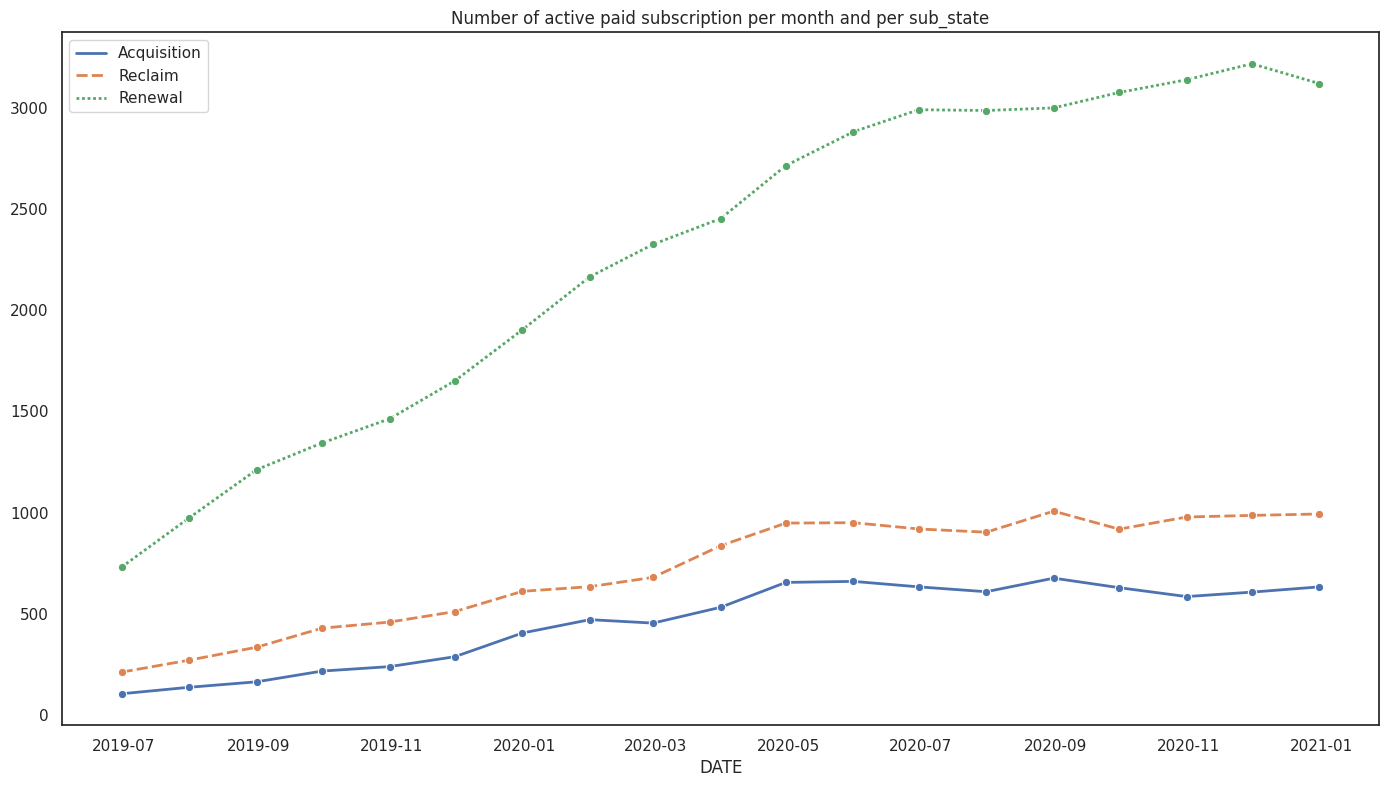

In [256]:
temp = pd.merge(df_paid_month,segmented_paid, left_index=True, right_index=True, how='left')
temp = temp[["Acquisition", "Reclaim", "Renewal"]]

fig = plt.figure(figsize=(17,9))
plt.title("Number of active paid subscription per month and per sub_state")
sns.lineplot(data=temp, marker='o');

# Analysis based on individuals

In [15]:
liste_ID = list(data["ACCT_ID"].unique())

In [16]:
class Customer:
    '''
    Create object customer with its metrics
    '''
    def __init__(self, acct_id):
        self.acct_id = acct_id
        self.df = data[data["ACCT_ID"] == acct_id].reset_index(drop=True)
        self.first_sub = self.df["SUB_STATE"][0]
        self.billable_type = self.df["SUBSCRIPTION_BILLABLE_TYPE"].value_counts().index[0]
        self.subscription_type = self.df["SUBSCRIPTION_TYPE"].value_counts().index[0]
        self.sku_length = self.df["SKU_LENGTH"].value_counts().index[0]
        self.sub_state = self.df["SUB_STATE"].value_counts().index[0]
        self.nb_sub = len(self.df)
        self.duration = total_dur[total_dur["ACCT_ID"] == self.acct_id]["DURATION"]
    
    def custom_df(self):
        '''
        Return metrics within a dataframe
        '''
        temp_dic = {"ACCT_ID":self.acct_id,
                    "FIRST_SUB":self.first_sub,
                    "SUBSCRIPTION_BILLABLE_TYPE":self.billable_type,
                    "SUBSCRIPTION_TYPE":self.subscription_type,
                    "SKU_LENGTH":self.sku_length,
                    "SUB_STATE":self.sub_state,
                    "NB_SUB": self.nb_sub,
                    "DURATION":self.duration
                   }
        custom_df = pd.DataFrame(temp_dic).reset_index(drop=True)
        return custom_df

## Test

In [17]:
data[data["ACCT_ID"] == liste_ID[2000]]

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,DURATION
5671,719643000000000,Paid,Wallet,1 month,Reclaim,2020-09-08,2020-10-08,30
5672,719643000000000,Paid,Wallet,1 month,Renewal,2020-10-08,2020-11-08,31
5673,719643000000000,Paid,Wallet,1 month,Renewal,2020-11-08,2020-12-08,30
5674,719643000000000,Paid,Wallet,1 month,Renewal,2020-12-08,2021-01-08,31


In [18]:
Customer("719643000000000").custom_df()

,ACCT_ID,FIRST_SUB,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,NB_SUB,DURATION
0,719643000000000,Reclaim,Paid,Wallet,1 month,Renewal,4,122


In [19]:
data[data["ACCT_ID"] == liste_ID[6000]]

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,DURATION
17534,823642000000000,Free,Trial,14 days,Trial,2020-03-26,2020-04-09,14


In [20]:
Customer("823642000000000").custom_df()

,ACCT_ID,FIRST_SUB,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,NB_SUB,DURATION
0,823642000000000,Trial,Free,Trial,14 days,Trial,1,14


## Creating the new dataframe

In [21]:
# It could be intersting to create a new dataframe focused on individuals
import time
start_time = time.time()

df_indiv = pd.DataFrame()
compteur = 0
for indiv in liste_ID:
    df_indiv = pd.concat([df_indiv, Customer(indiv).custom_df()])

print("--- %s seconds ---" % (time.time() - start_time))

--- 78.08861637115479 seconds ---


In [22]:
df_indiv

,ACCT_ID,FIRST_SUB,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,NB_SUB,DURATION
0,188368000000000,Reclaim,Paid,Wallet,1 month,Renewal,8,245
0,332317000000000,Reclaim,Paid,Wallet,1 month,Reclaim,1,31
0,715785000000000,Trial,Free,Trial,14 days,Trial,1,14
0,124177000000000,Renewal,Paid,Retail,12 months,Renewal,2,731
0,276332000000000,Trial,Free,Trial,14 days,Trial,1,14
...,...,...,...,...,...,...,...,...
0,239033000000000,Trial,Free,Trial,14 days,Trial,2,44
0,438950000000000,Renewal,Paid,Wallet,12 months,Renewal,2,731
0,675542000000000,Reclaim,Paid,Wallet,1 month,Renewal,8,244
0,301694000000000,Acquisition,Paid,Retail,3 months,Acquisition,3,274


In [166]:
df_indiv[df_indiv["SUBSCRIPTION_TYPE"] == "Wallet"]["DURATION"].mean()

369.0075417489675

In [167]:
df_indiv[df_indiv["SUBSCRIPTION_TYPE"] == "Retail"]["DURATION"].mean()

341.8514628657164

In [232]:
df_indiv[(df_indiv["FIRST_SUB"]=="Trial")&(df_indiv["NB_SUB"]>1)&(df_indiv["SUBSCRIPTION_TYPE"]!="Trial")]["DURATION"].mean()

277.9177215189873

In [180]:
df_indiv[(df_indiv["FIRST_SUB"]=="Trial")]

,ACCT_ID,FIRST_SUB,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,NB_SUB,DURATION
0,715785000000000,Trial,Free,Trial,14 days,Trial,1,14
0,276332000000000,Trial,Free,Trial,14 days,Trial,1,14
0,393019000000000,Trial,Free,Trial,14 days,Trial,1,14
0,339298000000000,Trial,Free,Trial,14 days,Trial,1,14
0,377559000000000,Trial,Free,Trial,14 days,Trial,1,14
...,...,...,...,...,...,...,...,...
0,364818000000000,Trial,Free,Trial,14 days,Trial,1,14
0,756688000000000,Trial,Free,Trial,14 days,Trial,1,14
0,333909000000000,Trial,Free,Trial,14 days,Trial,1,14
0,810009000000000,Trial,Free,Trial,14 days,Trial,1,14


In [230]:
df_indiv[(df_indiv["FIRST_SUB"]=="Trial")&(df_indiv["NB_SUB"]>1)&(df_indiv["SUBSCRIPTION_TYPE"]!="Trial")]

,ACCT_ID,FIRST_SUB,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,NB_SUB,DURATION
0,441271000000000,Trial,Paid,Wallet,1 month,Reclaim,6,228
0,592533000000000,Trial,Paid,Wallet,1 month,Renewal,5,136
0,269872000000000,Trial,Paid,Wallet,1 month,Trial,3,74
0,427356000000000,Trial,Paid,Wallet,1 month,Renewal,8,227
0,357113000000000,Trial,Paid,Wallet,1 month,Renewal,12,349
...,...,...,...,...,...,...,...,...
0,852066000000000,Trial,Paid,Wallet,1 month,Trial,3,75
0,204109000000000,Trial,Paid,Wallet,1 month,Renewal,6,167
0,362534000000000,Trial,Paid,Wallet,1 month,Trial,3,75
0,208319000000000,Trial,Paid,Wallet,1 month,Renewal,6,166


In [231]:
316/3003

0.10522810522810523

In [233]:
df_indiv[df_indiv["SUB_STATE"] == "Renewal"]["DURATION"].mean()

430.5336475517151

In [235]:
df_indiv[df_indiv["SUB_STATE"] == "Reclaim"]["DURATION"].mean()

313.50539083557953

In [236]:
df_indiv[df_indiv["SUB_STATE"] == "Acquisition"]["DURATION"].mean()

254.99062918340027

In [237]:
df_indiv[df_indiv["SUB_STATE"] == "Trial"]["DURATION"].mean()

30.029727793696274

<AxesSubplot:xlabel='SKU_LENGTH', ylabel='Count'>

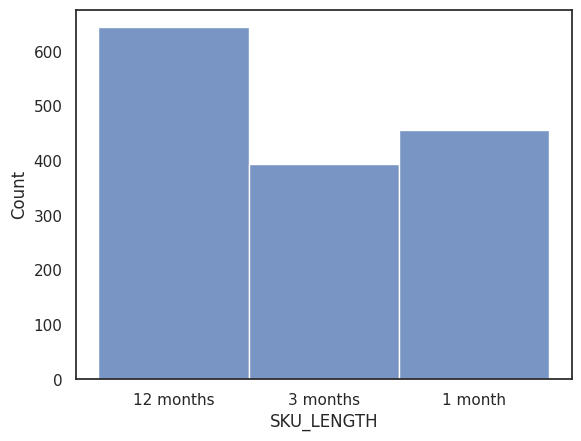

In [240]:
sns.histplot(df_indiv[df_indiv["SUB_STATE"] == "Acquisition"]["SKU_LENGTH"])